In [1]:
import numpy as np
import pandas as pd
import re
import os
from os import path
import sys
from metrics import get_metrics, aggregate_res
from datetime import date

In [2]:
# dic for result to data subfolder mapping
dic_map_atac = {'kidney': 'kidney/ATAC',
               'lung_droplet': 'lung/sci-atac',
               'lung_facs': 'lung/sci-atac',
               'brain': 'brain/sci-atac',
               'PBMC': 'PBMC/ATAC', 
               'BMMC': 'BMMC/ATAC'
}
dic_map_rna = {'kidney': 'kidney/RNA',
               'lung_droplet': 'lung/droplet',
               'lung_facs': 'lung/FACS',
               'brain': 'brain/FACS',
               'PBMC': 'PBMC/RNA',
               'BMMC': 'BMMC/RNA'
}


In [3]:
# dic for sim matrix for each data
dic_sim = {'kidney': '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseKidney/sim_kidney.csv',
           'brain': '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseAtlas/sim_brain.csv',
           'lung': '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseAtlas/sim_lung.csv',
           'BMMC': '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/BMMC/sim_BMMC.csv',
           'PBMC': '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/sim_PBMC.csv',
          }

In [4]:
tissues = ['lung_droplet', 'lung_facs', 'kidney', 'PBMC', 'BMMC', 'brain']

In [33]:
# loop through each tissue and method
re = []
for result_tissue in tissues:
    if result_tissue.startswith('lung'):
        methods = ['conos', 'conos_pagoda', 'seurat3', 'scGCN', 'scJoint', 'knn', 'random', 'ensemble']
    elif result_tissue == 'brain':
        methods = ['conos', 'conos_pagoda', 'bridge_snare', 'bridge_share', 'seurat3', 
                   'scGCN', 'scJoint', 'knn', 'random', 'ensemble']
    else:
        methods = ['conos', 'conos_pagoda', 'bridge', 'seurat3', 'scGCN', 'scJoint', 'knn', 'random', 'ensemble']
    data_tissue_atac = dic_map_atac[result_tissue]
    data_tissue_rna = dic_map_rna[result_tissue]
    # paths
    data_path = '/gpfs/gibbs/pi/zhao/xs272/Multiomics/sc_benchmark/data/%s' % data_tissue_atac
    rna_path = '/gpfs/gibbs/pi/zhao/xs272/Multiomics/sc_benchmark/data/%s' % data_tissue_rna
    result_path = '/gpfs/gibbs/pi/zhao/xs272/Multiomics/sc_benchmark/results/%s' % result_tissue
    for method in methods:
        # load prob matrix
        try:
            prob = pd.read_csv(path.join(result_path, '%s/prob.csv' % method), index_col=0)
        except:
            print('File not available for %s in tissue %s' % (method, result_tissue))
            continue
        ## load true labels
        cells = np.loadtxt(path.join(data_path, 'cells.txt'), dtype=object, delimiter='SPACEISPARTOFTHENAME')
        true_label = np.loadtxt(path.join(data_path, 'annotations.txt'), dtype=object, delimiter='SPACESHOULDB')
        true_label = pd.DataFrame(true_label, index = cells, columns = ['annotation'])
        ## load sim matrix
        sim = pd.read_csv(dic_sim[result_tissue.split('_')[0]], index_col=0)
        ## prepare input to aggregate_res
        param = [prob, true_label, sim, result_tissue, method, rna_path]
        re.append(param)


In [34]:
len(re)

53

In [35]:
for i in range(len(re)):
    try:
        aggregate_res([re[i]], atac_unique=True)
    except:
        print(i)
        break

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-pack

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: divide by zero encountered in log2
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: invalid value encountered in multiply
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw5

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-pack

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/skl

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: divide by zero encountered in log2
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: invalid value encountered in multiply
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw5

In [37]:
# run evaluation
compare_res = aggregate_res(re, atac_unique=True)

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-pack

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: divide by zero encountered in log2
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: invalid value encountered in multiply
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw5

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-pack

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/skl

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: divide by zero encountered in log2
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics.py:37: RuntimeWarning: invalid value encountered in multiply
  entropy = np.nansum(-S*np.log2(S), axis=1).mean()/np.log2(S.shape[1])
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/gibbs/pi/zhao/yw5

In [38]:
compare_res

,overall_accuracy,weighted_accuracy,weighted_accuracy_for_unique_ct_in_atac,entropy_for_unique_ct_in_atac,enrichment_for_unique_ct_in_atac,f1_for_unique_ct_in_atac,f1 macro,precision macro,recall macro,data,method
0,0.267836,0.365445,0.164615,0.183718,0.816489,0.183614,0.173325,0.191043,0.192205,lung_droplet,conos
1,0.414954,0.473641,0.164668,0.100722,0.896472,0.102106,0.242355,0.270459,0.259353,lung_droplet,conos_pagoda
2,0.424325,0.440787,0.167193,0.407365,0.567443,0.419583,0.258429,0.306859,0.244373,lung_droplet,seurat3
3,0.443168,0.455949,0.179340,0.564958,0.540102,0.507043,0.247177,0.277585,0.262732,lung_droplet,scGCN
4,0.614369,0.671471,0.178830,0.008976,0.991161,0.008907,0.331899,0.329168,0.357839,lung_droplet,scJoint
5,0.145506,0.230830,0.190005,0.417517,0.620638,0.397526,0.053283,0.139306,0.083783,lung_droplet,knn
6,0.035772,0.133050,0.102831,1.000000,0.090909,0.952381,0.024277,0.046940,0.029560,lung_droplet,random
7,0.552801,0.674719,0.234901,0.564080,0.539208,0.507231,0.307821,0.317757,0.315877,lung_droplet,ensemble
8,0.362152,0.435096,0.170706,0.171345,0.835228,0.167994,0.134343,0.136463,0.137780,lung_facs,conos
9,0.488513,0.558061,0.192500,0.063676,0.939382,0.062109,0.234379,0.238121,0.234384,lung_facs,conos_pagoda


In [39]:
compare_res.shape

(53, 11)

In [40]:
compare_res.to_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/metrics_tissues_%s.csv' % (date.today()))

# Visualizations

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
sns.set(rc={'figure.figsize':(6,6)})

In [52]:
sns.set(font_scale = 1.2, style='white')

# Metrics

In [53]:
df = pd.read_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/metrics_tissues_2022-09-19.csv', index_col=0)
df = df.replace({'conos': 'Conos (Seurat)', 'conos_pagoda': 'Conos', 'bridge': 'Bridge',
                 'seurat3': 'Seurat v3', 'knn': 'KNN', 'random': 'Random', 'ensemble': 'Ensemble',
                 'bridge_snare': 'Bridge (SNARE)', 'bridge_share': 'Bridge (SHARE)'})
df = df.replace({'lung_droplet': 'Mouse\nlung\n(droplet)', 'lung_facs': 'Mouse\nlung\n(FACS)', 'brain': 'Mouse\nbrain', 'kidney': 'Mouse\nkidney'})

In [54]:
df

,overall_accuracy,weighted_accuracy,weighted_accuracy_for_unique_ct_in_atac,entropy_for_unique_ct_in_atac,enrichment_for_unique_ct_in_atac,f1_for_unique_ct_in_atac,f1 macro,precision macro,recall macro,data,method
0,0.267836,0.365445,0.164615,0.183718,0.816489,0.183614,0.173325,0.191043,0.192205,Mouse\nlung\n(droplet),Conos (Seurat)
1,0.414954,0.473641,0.164668,0.100722,0.896472,0.102106,0.242355,0.270459,0.259353,Mouse\nlung\n(droplet),Conos
2,0.424325,0.440787,0.167193,0.407365,0.567443,0.419583,0.258429,0.306859,0.244373,Mouse\nlung\n(droplet),Seurat v3
3,0.443168,0.455949,0.179340,0.564958,0.540102,0.507043,0.247177,0.277585,0.262732,Mouse\nlung\n(droplet),scGCN
4,0.614369,0.671471,0.178830,0.008976,0.991161,0.008907,0.331899,0.329168,0.357839,Mouse\nlung\n(droplet),scJoint
5,0.145506,0.230830,0.190005,0.417517,0.620638,0.397526,0.053283,0.139306,0.083783,Mouse\nlung\n(droplet),KNN
6,0.035772,0.133050,0.102831,1.000000,0.090909,0.952381,0.024277,0.046940,0.029560,Mouse\nlung\n(droplet),Random
7,0.552801,0.674719,0.234901,0.564080,0.539208,0.507231,0.307821,0.317757,0.315877,Mouse\nlung\n(droplet),Ensemble
8,0.362152,0.435096,0.170706,0.171345,0.835228,0.167994,0.134343,0.136463,0.137780,Mouse\nlung\n(FACS),Conos (Seurat)
9,0.488513,0.558061,0.192500,0.063676,0.939382,0.062109,0.234379,0.238121,0.234384,Mouse\nlung\n(FACS),Conos


In [55]:
dic = {'overall_accuracy': 'Overall accuracy',
       'weighted_accuracy': 'Weighted accuracy',
       'f1 macro': 'F1 (macro)'}
dic_unique = {'weighted_accuracy_for_unique_ct_in_atac': 'Weighted accuracy\n(ATAC-specific cell types)',
               'entropy_for_unique_ct_in_atac': 'Entropy (ATAC-specific cell types)',
               'enrichment_for_unique_ct_in_atac': 'Enrichment (ATAC-specific cell types)',
               'f1_for_unique_ct_in_atac': 'F1 of entropy and enrichment\n(ATAC-specific cell types)'}

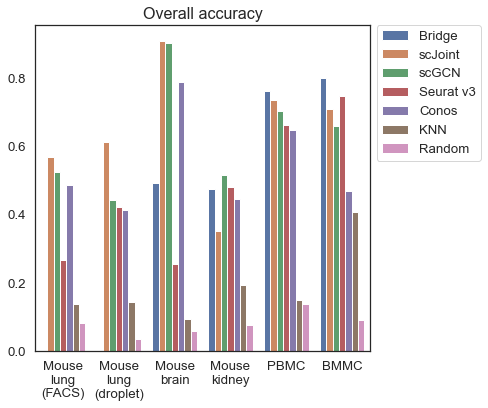

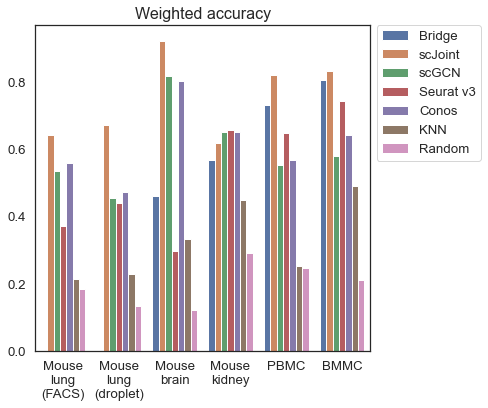

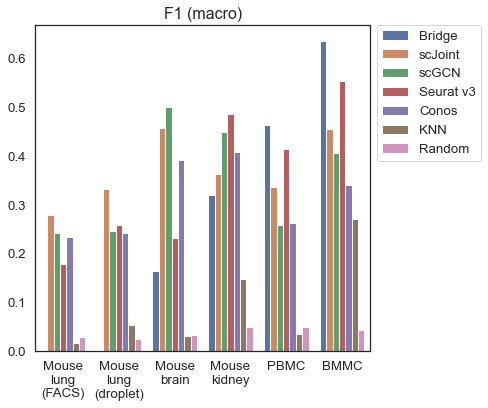

In [56]:
for m in dic.keys():
    fig, ax = plt.subplots()
    df_sub = df[~df.method.isin(['Conos (Seurat)', 'Ensemble', 'Bridge (SHARE)'])]
    df_sub = df_sub.replace({'Bridge (SNARE)': 'Bridge'})
    df_sub.method = df_sub.method.astype('category')
    methods = ['Bridge', 'scJoint', 'scGCN', 'Seurat v3','Conos', 'KNN', 'Random']
    df_sub.method = df_sub.method.cat.reorder_categories(methods)
    df_sub.data = df_sub.data.astype('category')
    datas = ['Mouse\nlung\n(FACS)', 'Mouse\nlung\n(droplet)', 'Mouse\nbrain', 'Mouse\nkidney', 'PBMC', 'BMMC']
    df_sub.data = df_sub.data.cat.reorder_categories(datas)
    sns.barplot(x='data', y=m, hue='method', data=df_sub, ax=ax)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.set_ylabel('')
    ax.set_xlabel('', fontsize=14)
    ax.set_title(dic[m], fontsize=16)
    plt.savefig('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/tissues_%s.png' % (m), dpi=600, bbox_inches="tight")

/tmp/ipykernel_2010/806208278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['data'] = df_sub.data.astype('category')
/tmp/ipykernel_2010/806208278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['data'] = df_sub['data'].cat.reorder_categories(datas)
/tmp/ipykernel_2010/806208278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

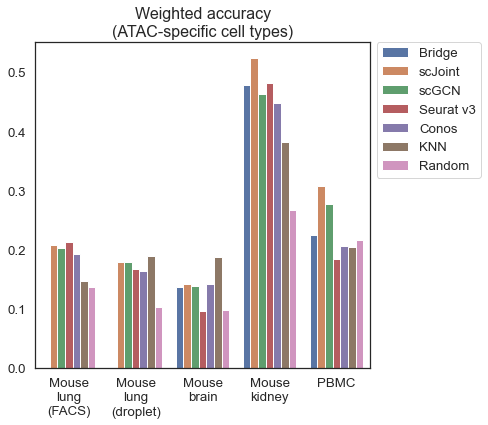

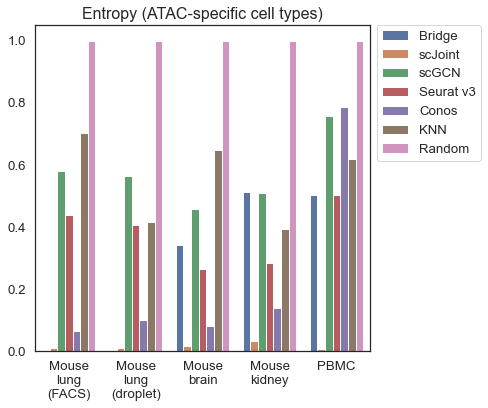

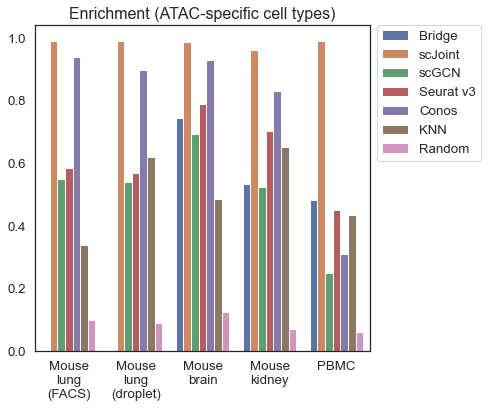

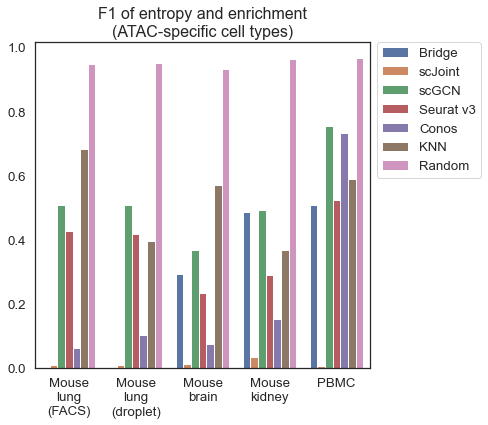

In [57]:
for m in dic_unique.keys():
    fig, ax = plt.subplots()
    df_sub = df[df.data != 'BMMC']
    df_sub['data'] = df_sub.data.astype('category')
    datas = ['Mouse\nlung\n(FACS)', 'Mouse\nlung\n(droplet)', 'Mouse\nbrain', 'Mouse\nkidney', 'PBMC']
    df_sub['data'] = df_sub['data'].cat.reorder_categories(datas)
    df_sub = df_sub[~df_sub.method.isin(['Conos (Seurat)', 'Ensemble', 'Bridge (SHARE)'])]
    df_sub = df_sub.replace({'Bridge (SNARE)': 'Bridge'})
    df_sub.method = df_sub.method.astype('category')
    methods = ['Bridge', 'scJoint', 'scGCN', 'Seurat v3','Conos', 'KNN', 'Random']
    df_sub.method = df_sub.method.cat.reorder_categories(methods)
    sns.barplot(x='data', y=m, hue='method', data=df_sub, ax=ax)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.set_ylabel('')
    ax.set_xlabel('', fontsize=14)
    ax.set_title(dic_unique[m], fontsize=16)
    plt.savefig('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/tissues_%s.png' % (m), dpi=600, bbox_inches="tight")

In [26]:
df_brain_bridge = df[df.method.isin(['Bridge (SNARE)', 'Bridge (SHARE)'])]
del df_brain_bridge['entropy_for_unique_ct_in_atac']
del df_brain_bridge['enrichment_for_unique_ct_in_atac']
del df_brain_bridge['precision macro']
del df_brain_bridge['recall macro']
del df_brain_bridge['data']

In [27]:
df_brain_bridge = df_brain_bridge.rename({'overall_accuracy': 'metric_overall_accuracy',
                        'weighted_accuracy': 'metric_weighted_accuracy',
                        'f1 macro': 'metric_f1_macro',
                        'weighted_accuracy_for_unique_ct_in_atac': 'metric_weighted_accuracy_for_unique_ct_in_atac',
                        'f1_for_unique_ct_in_atac': 'metric_f1_for_unique_ct_in_atac'
                        }, axis='columns')

In [28]:
df_brain_bridge = pd.wide_to_long(df_brain_bridge, ['metric_'], i='method', j='metric',suffix='\w+')
df_brain_bridge = df_brain_bridge.reset_index()

In [29]:
dic = {'overall_accuracy': 'Overall accuracy',
       'weighted_accuracy': 'Weighted accuracy',
       'f1_macro': 'F1 (macro)',
       'weighted_accuracy_for_unique_ct_in_atac': 'Weighted accuracy \n(unique cell types\nin ATAC)',
       'f1_for_unique_ct_in_atac': 'F1 (entropy and enrichment) \n(unique cell types\nin ATAC)'}
df_brain_bridge = df_brain_bridge.replace(dic)

In [30]:
df_brain_bridge.metric = df_brain_bridge.metric.astype('category')
df_brain_bridge.metric = df_brain_bridge.metric.cat.reorder_categories(list(dic.values()))

In [33]:
sns.set(rc={'figure.figsize':(18,8)})
sns.set(font_scale = 1.5, style='white')

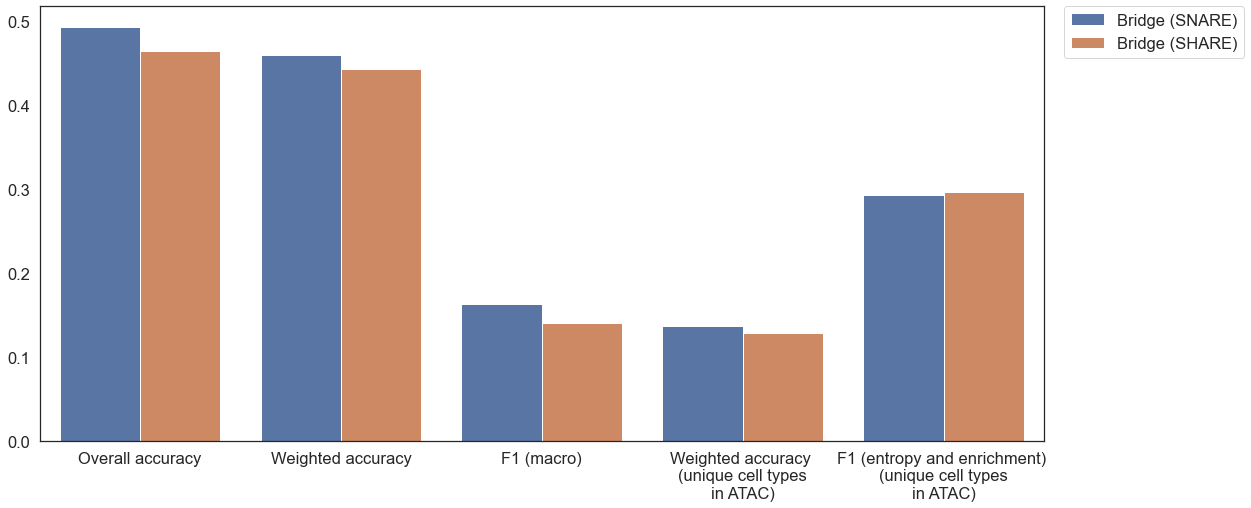

In [35]:
fig, ax = plt.subplots()
sns.barplot(x='metric', y='metric_', hue='method', data=df_brain_bridge)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_ylabel('')
ax.set_xlabel('')
# ax.set_title('Bridge performance on mouse brain\nwith difference multiome data', fontsize=16)
plt.savefig('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/tissues_brain_bridge.png', dpi=600, bbox_inches="tight")

## Time & memory

In [40]:
df = pd.read_excel('/gpfs/gibbs/pi/zhao/yw599/Multiome/time_mem/tissues_time_mem.xlsx')

In [42]:
df_sub.method.value_counts()

Conos                 6
Seurat v3             6
scGCN                 6
scJoint               6
Bridge integration    3
Bridge                1
Name: method, dtype: int64

In [44]:
df_sub = df[~df.method.isin(['Conos (Seurat)', 'scGCN (prep)', 'scGCN (train)', 'Bridge (SHARE)'])]
df_sub = df_sub.replace({'Bridge (SNARE)': 'Bridge', 'Bridge integration': 'Bridge', 'Seurat3': 'Seurat v3', 'Conos (Pagoda2)': 'Conos'})
df_sub.method = df_sub.method.astype('category')
methods = ['Bridge', 'scJoint', 'scGCN', 'Seurat v3','Conos']
df_sub.method = df_sub.method.cat.reorder_categories(methods)
df_sub = df_sub.replace({'Lung (droplet)': 'Mouse\nlung\n(droplet)', 'Lung (FACS)': 'Mouse\nlung\n(FACS)', 'Brain': 'Mouse\nbrain', 'Kidney': 'Mouse\nkidney'})

In [45]:
df_sub.tissue.value_counts()

Mouse\nkidney             5
BMMC                      5
Mouse\nbrain              5
PBMC                      5
Mouse\nlung\n(droplet)    4
Mouse\nlung\n(FACS)       4
Name: tissue, dtype: int64

In [46]:
df_sub.tissue = df_sub.tissue.astype('category')
datas = ['Mouse\nlung\n(FACS)', 'Mouse\nlung\n(droplet)', 'PBMC', 'Mouse\nbrain', 'BMMC', 'Mouse\nkidney']
df_sub.tissue = df_sub.tissue.cat.reorder_categories(datas)

In [47]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale = 1.2, style='white')

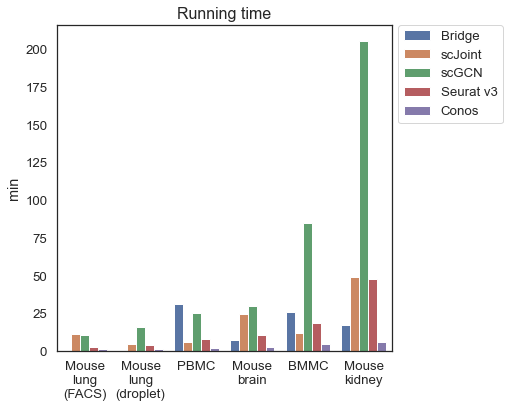

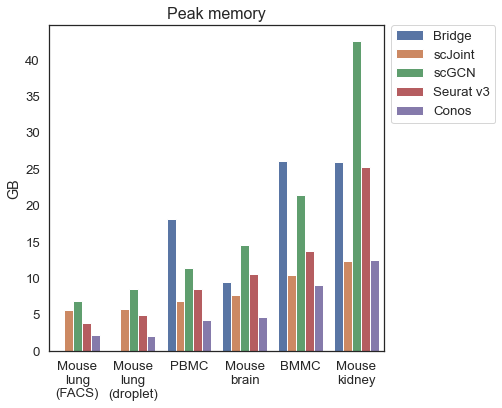

In [48]:
fig, ax = plt.subplots()
sns.barplot(x='tissue', y='time', hue='method', data=df_sub, ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_ylabel('min')
ax.set_xlabel('')
ax.set_title('Running time', fontsize=16)
plt.savefig('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/tissues_time.png', dpi=600, bbox_inches="tight")
fig, ax = plt.subplots()
sns.barplot(x='tissue', y='memory', hue='method', data=df_sub, ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_ylabel('GB')
ax.set_xlabel('', fontsize=14)
ax.set_title('Peak memory', fontsize=16)
plt.savefig('/gpfs/gibbs/pi/zhao/yw599/Multiome/metrics/tissues_mem.png', dpi=600, bbox_inches="tight")